In [1]:
# 这里我们使用facebook发布的时间序列自动预测程序包prophet进行预测
library(prophet)
library(dplyr)
library(readr)

Loading required package: Rcpp

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
# 载入数据并拟合模型
df <- read_csv("~/Documents/MyPrograming/R/TimeSeriesAnalysis/Projects/coal_production/clean_data.csv")
m <- prophet(df)
future <- make_future_dataframe(m, periods = 6, freq = 'm')
tail(future)

Parsed with column specification:
cols(
  y = col_double(),
  ds = col_date(format = "")
)
Disabling weekly seasonality. Run prophet with weekly.seasonality=TRUE to override this.
Disabling daily seasonality. Run prophet with daily.seasonality=TRUE to override this.


Initial log joint probability = -3.02658
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


,ds
109,2009-02-01
110,2009-03-01
111,2009-04-01
112,2009-05-01
113,2009-06-01
114,2009-07-01


,ds,yhat,yhat_lower,yhat_upper
109,2009-02-01,20371.67,19479.45,21267.66
110,2009-03-01,23015.99,22083.76,23989.97
111,2009-04-01,23177.45,22268.68,24097.06
112,2009-05-01,23502.91,22597.41,24342.60
113,2009-06-01,24109.26,23180.90,25000.91
114,2009-07-01,23332.45,22462.79,24259.87


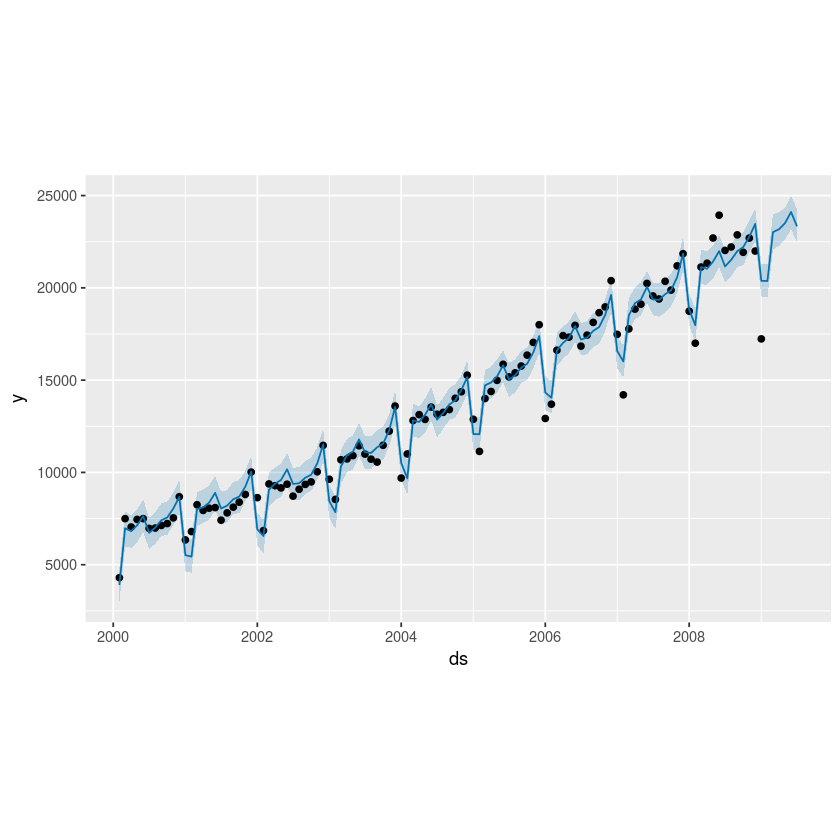

In [3]:
# 进行预测
forecast <- predict(m, future)
tail(forecast[c('ds', 'yhat', 'yhat_lower', 'yhat_upper')])
plot(m, forecast)

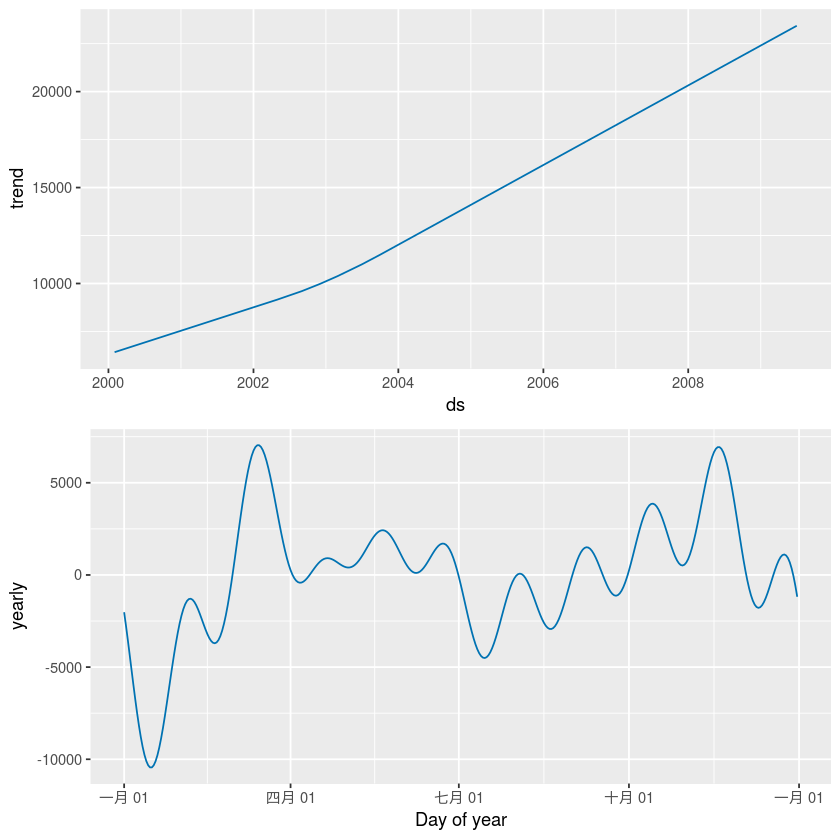

In [4]:
# 趋势分解
prophet_plot_components(m, forecast)

In [5]:
# 误差分析
coal.data <- read_csv("~/Documents/MyPrograming/R/TimeSeriesAnalysis/Projects/coal_production/coal_data.csv")

coal.ts <- ts(rev(coal.data$Num), start = c(2000,1), end=c(2017, 10),
              frequency = 12)
fore_true <- window(coal.ts, start=c(2009, 2), end=c(2009, 7))

fore_pred <- tail(forecast$yhat)
rmse <- sqrt(mean((fore_true-fore_pred)^2))
rmse

Parsed with column specification:
cols(
  Num = col_double(),
  Date = col_character()
)


[1] 1952.839